![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Assignement Session 5 and 6

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2020-11-12)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-dsf-2020/blob/main/exercises/Session_5_6_EXERCISES.ipynb)

# EXERCISE 1: image filtering

From the datasets (images) available from [skimage data](https://scikit-image.org/docs/dev/api/skimage.data.html), choose an **RGB** image and do the following:

* Crop the image
* Smoothen the image with a kernel filter.
* Sharpen the image with a kernel filter
* Find the edges of the image with at least two different methods.
* From the processes above, save the image that you prefer as a .jpg

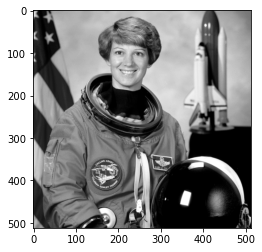

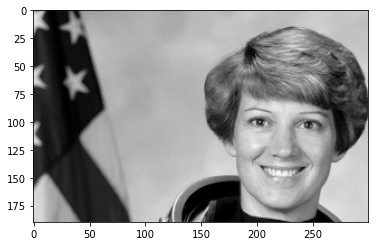

In [1]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2gray
original = data.astronaut()
grayscale = rgb2gray(original)

plt.imshow(grayscale, cmap=plt.cm.gray)
plt.show()

#CROP THE IMAGE

lx, ly = grayscale.shape

cropped_face = grayscale[lx==0:190, ly==100:300]

plt.imshow(cropped_face, cmap=plt.cm.gray)

plt.show()

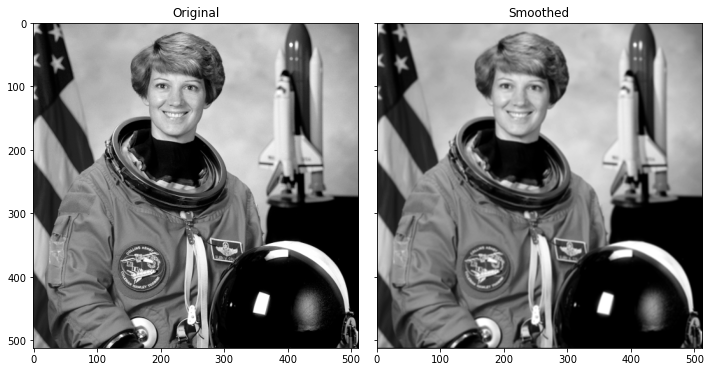

In [2]:
#Smoothen the image with a kernel filter
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt


kernel = np.array([ [1/2000,1/2000,1/2000], 
                    [1/2000,1/2000,1/2000], 
                    [1/2000,1/2000,1/2000]]) 

filtered1 = ndimage.convolve(grayscale, kernel, mode='constant', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(grayscale, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered1, cmap=plt.cm.gray)
ax[1].set_title('Smoothed')

plt.tight_layout()
plt.show()


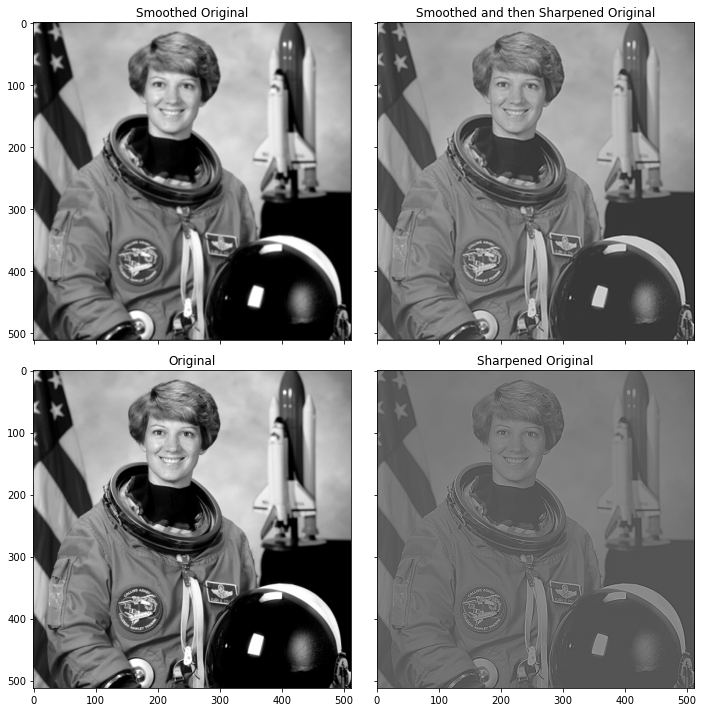

In [3]:
#Sharpen the image with a kernel filter

import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt


kernel = np.array([ [0, -1, 0], 
                    [-1, 5, -1], 
                    [0, -1, 0]])

filtered2 = ndimage.convolve(filtered1, kernel, mode='mirror', cval=0.0)

filtered3 = ndimage.convolve(grayscale, kernel, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=2,nrows=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0,0].imshow(filtered1, cmap=plt.cm.gray)
ax[0,0].set_title('Smoothed Original')

ax[0,1].imshow(filtered2, cmap=plt.cm.gray)
ax[0,1].set_title('Smoothed and then Sharpened Original')

ax[1,0].imshow(grayscale, cmap=plt.cm.gray)
ax[1,0].set_title('Original')

ax[1,1].imshow(filtered3, cmap=plt.cm.gray)
ax[1,1].set_title('Sharpened Original')

plt.tight_layout()
plt.show()


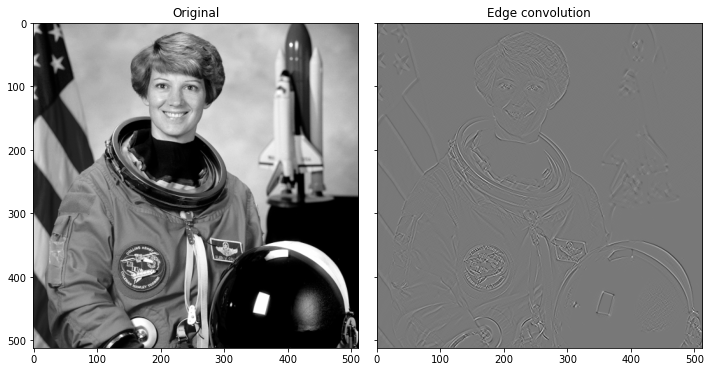

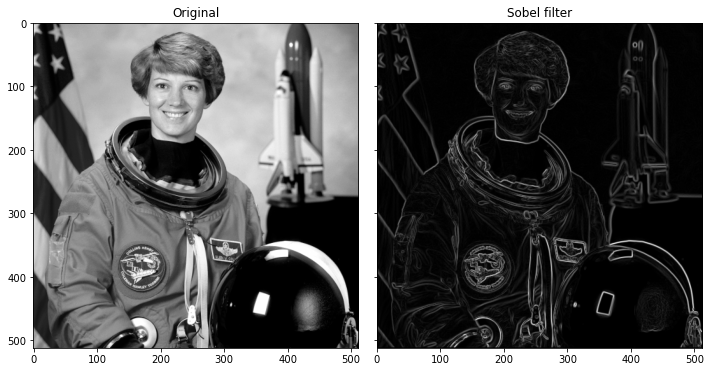

In [4]:
#Find the edges of the image with at least two different methods
#First method
kernel_edge = np.array([ [1, 0, -1], 
                       [0, 0, 0], 
                        [-1, 0, 1]])


edge1 = ndimage.convolve(grayscale, kernel_edge, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(grayscale, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(edge1, cmap=plt.cm.gray)
ax[1].set_title('Edge convolution')

plt.tight_layout()
plt.show()

#Second method
from skimage.filters import sobel
edge2=sobel(grayscale)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(grayscale, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(edge2, cmap=plt.cm.gray)
ax[1].set_title('Sobel filter')


plt.tight_layout()
plt.show()

In [5]:
#From the processes above, save the image that you prefer as a .jpg

import imageio
imageio.imwrite('astronautacontornato.jpg', edge2)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


# EXERCISE 2: semi-super resolution!

Take one image on your own (or one blurred image from somewhere) and apply the techniques we have seen in class to sharpen an image from a blurred one. You can also blur one image of your own as a start.

Mean  105.38391366666667 | Max  255 | Min  6


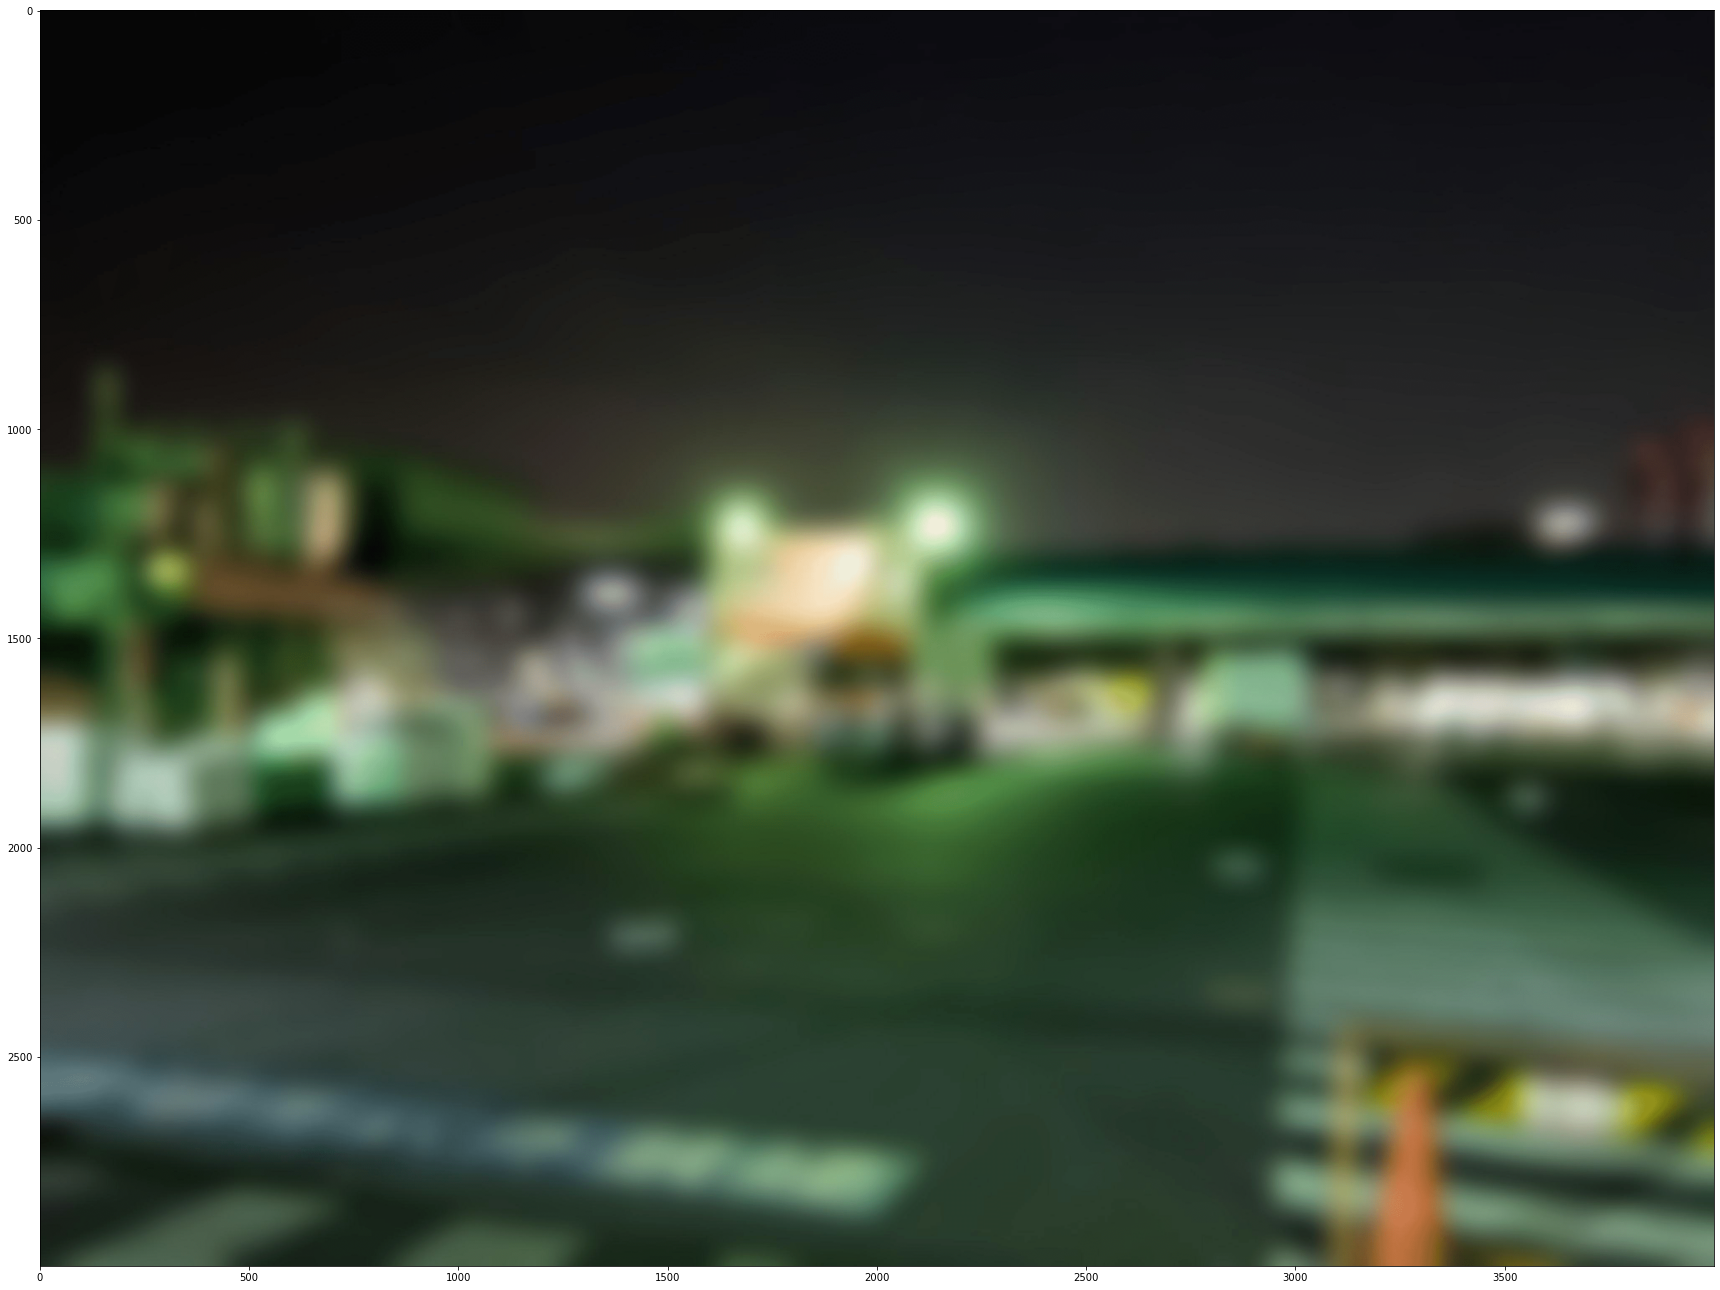

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread
import PIL
import imageio
import scipy
import scipy.ndimage
street = imageio.imread(r'C:\Users\damia\Desktop\blur.png')
print("Mean ", street.mean(), "| Max ", street.max(), "| Min ", street.min())
plt.figure(figsize = (30,30))
street_pyplot = plt.imshow(street, cmap="gray")




Mean  0.23867587439647023 | Max  0.9293450980392156 | Min  0.023529411764705882


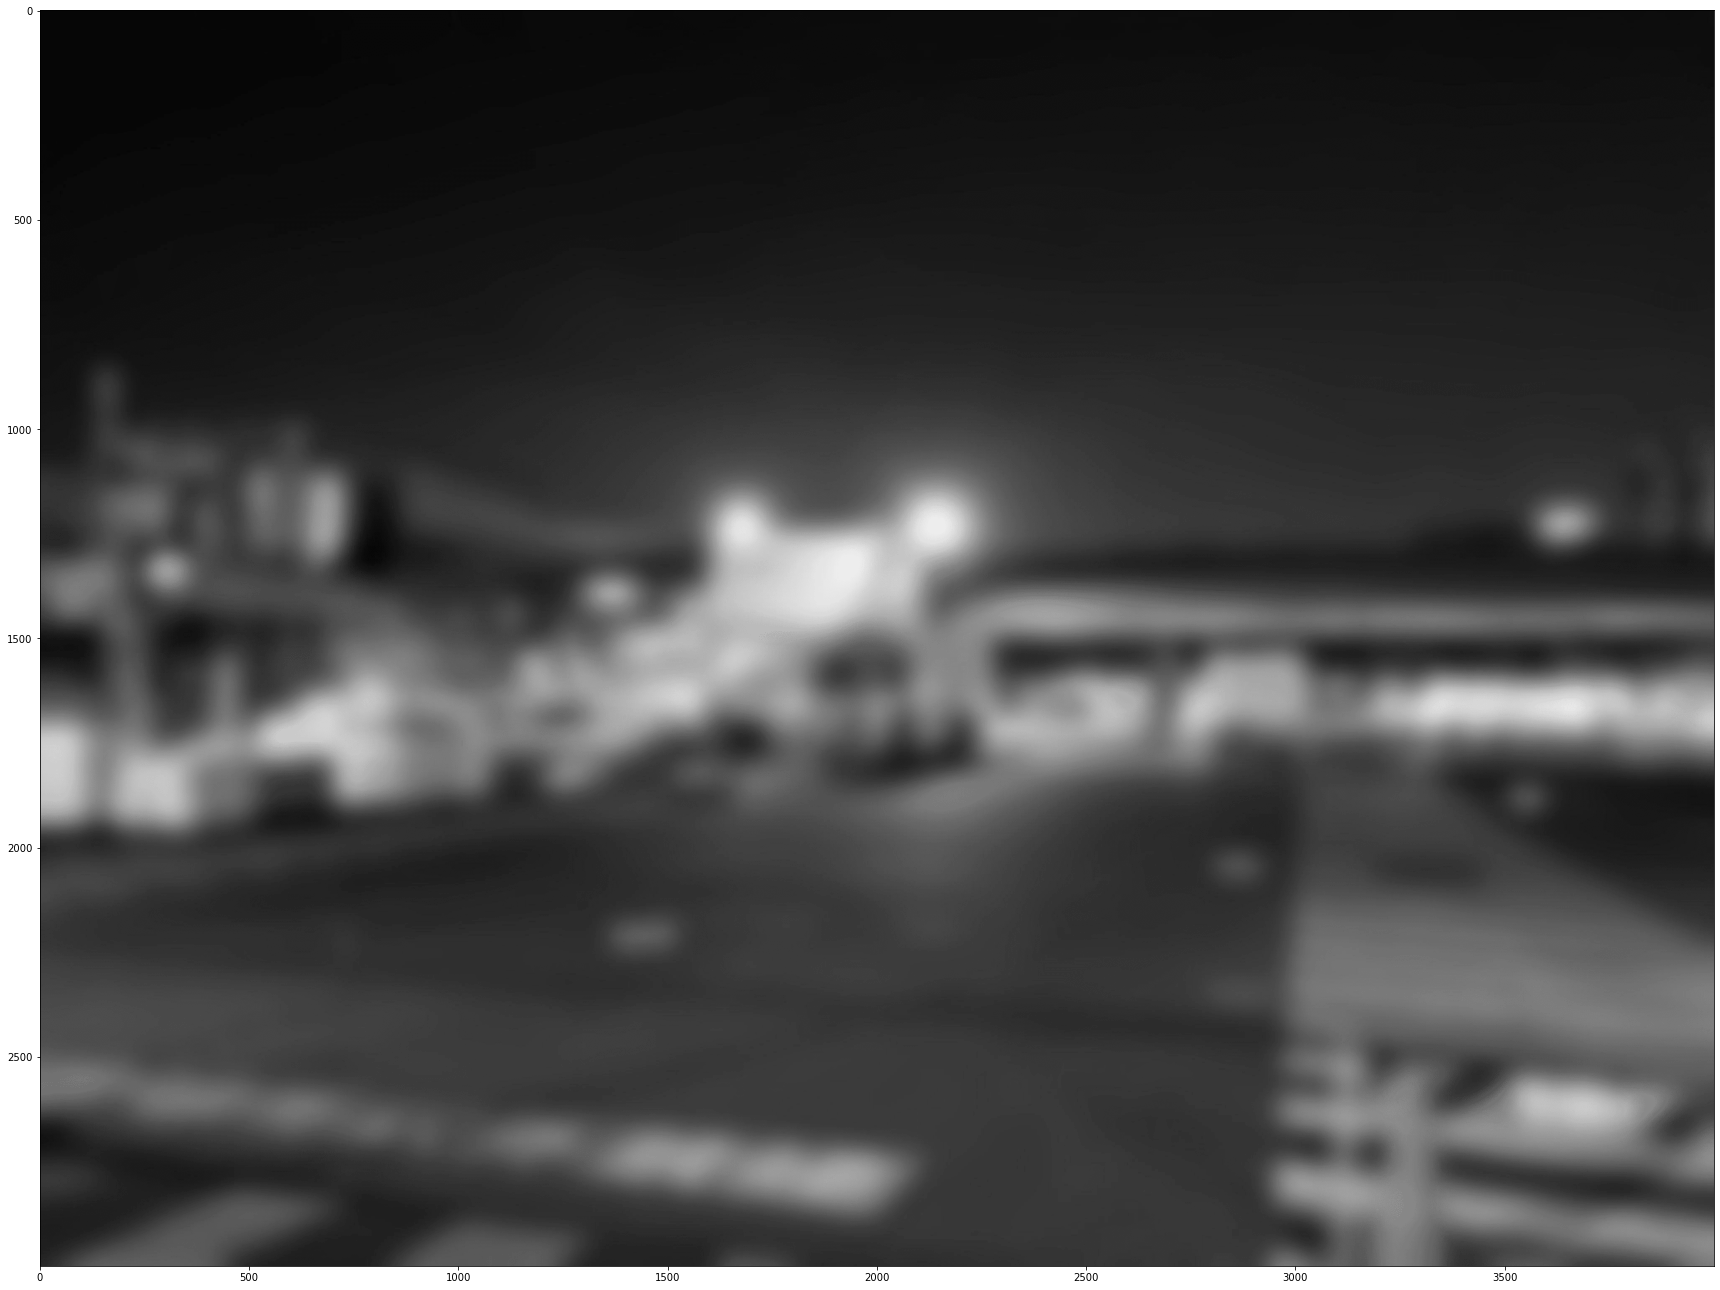

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


streetgray = rgb2gray(street)    
print("Mean ", streetgray.mean(), "| Max ", streetgray.max(), "| Min ", streetgray.min())
plt.figure(figsize = (30,30))
plt.imshow(streetgray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()



In [8]:
type(streetgray)

numpy.ndarray

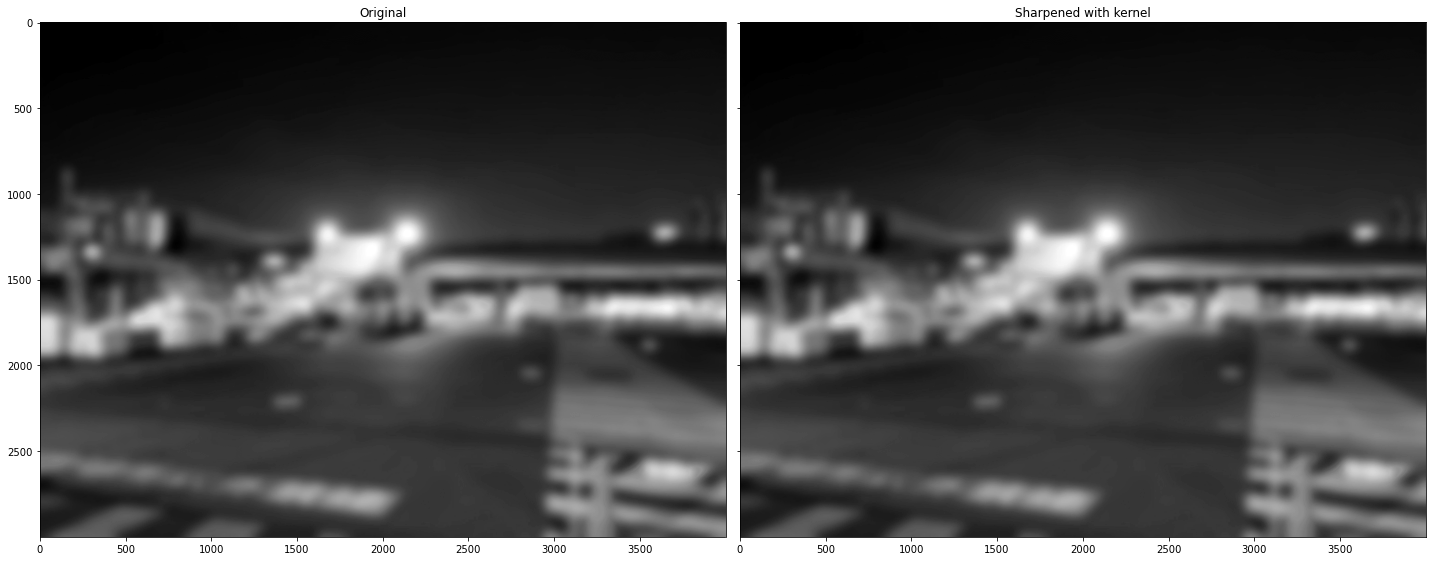

In [9]:
import numpy as np
import matplotlib.pyplot as plt


kernel = np.array([ [0, -1, 0], 
                    [-1, 5000, -1], 
                    [0, -1, 0]])

streetgray_kernelsharpened = ndimage.convolve(streetgray, kernel, mode='mirror', cval=0.0)
#filtered1 = ndimage.convolve(grayscale, kernel, mode='constant', cval=0.0)


fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(20, 20))

ax[0].imshow(streetgray, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(streetgray_kernelsharpened, cmap=plt.cm.gray)
ax[1].set_title('Sharpened with kernel')

plt.tight_layout()
plt.show()

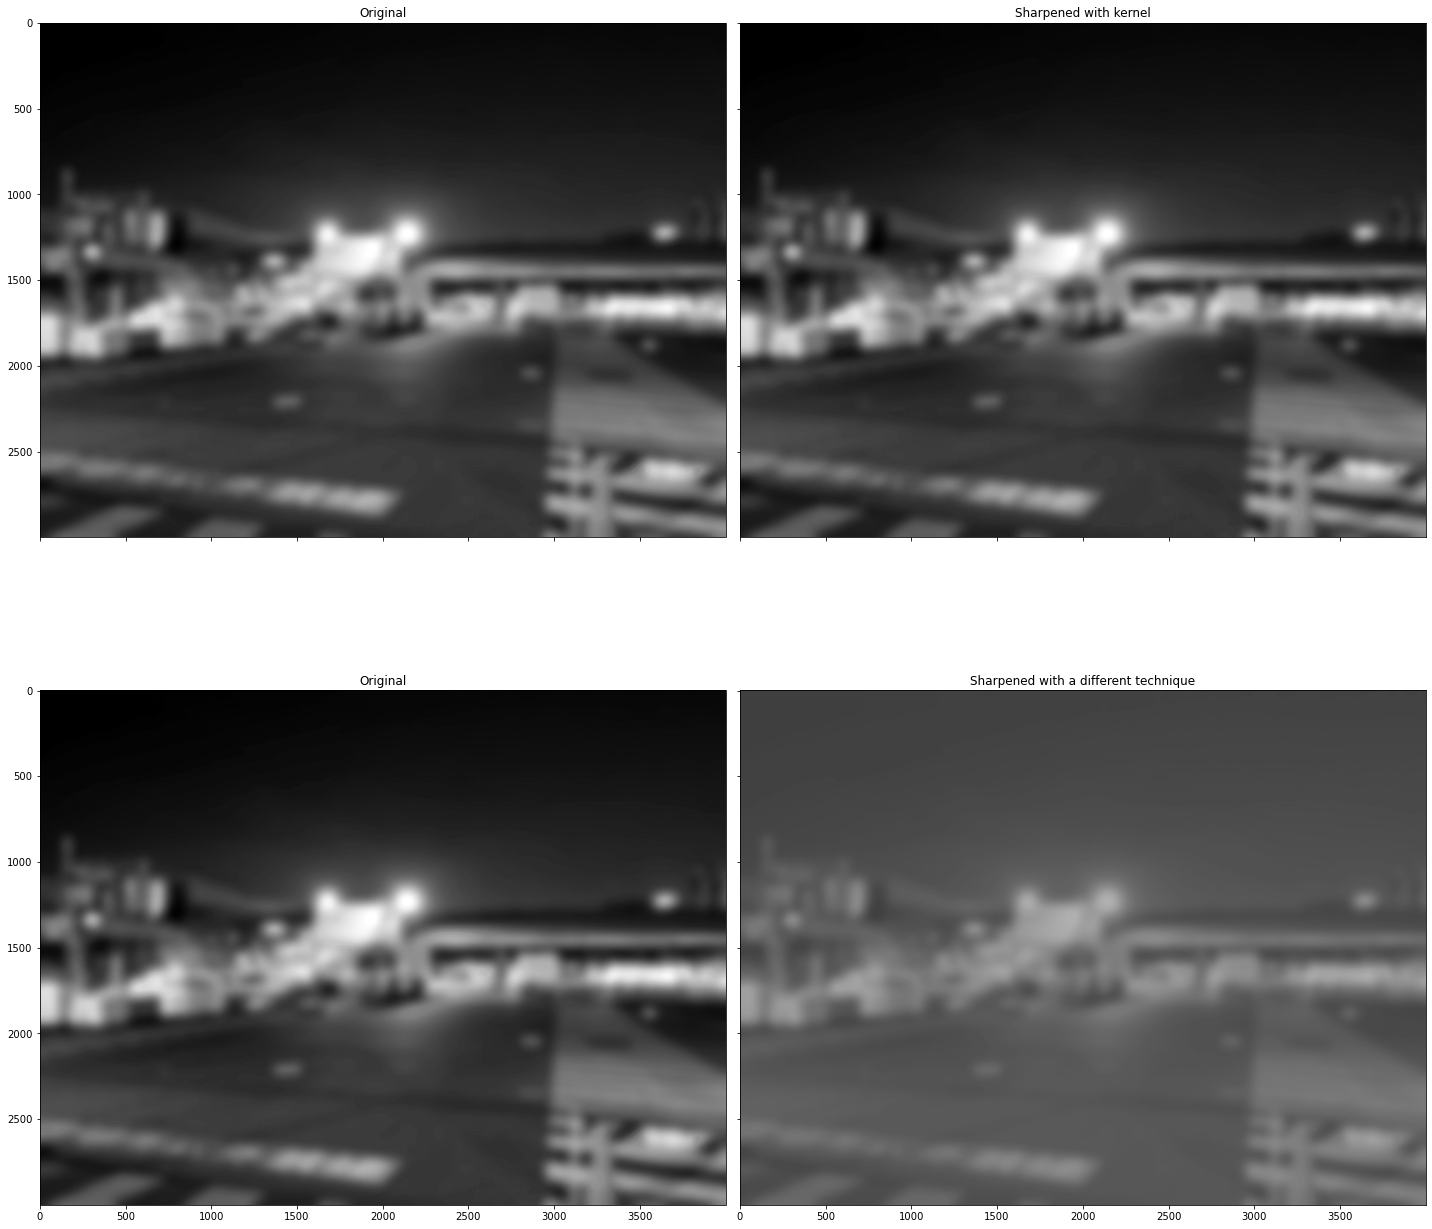

In [10]:
import scipy.misc
import matplotlib.pyplot as plt

# I create a filter of the blurred image using sigma 1
streetgray_blurred_filtered = ndimage.gaussian_filter(streetgray, 1)

# I use an approximation of the Laplacian for increasing the weights of edges
alpha = 5
streetgray_sharpened = streetgray + alpha * (streetgray - streetgray_blurred_filtered)



fig, ax = plt.subplots(ncols=2,nrows=2, sharex=True, sharey=True,
                       figsize=(20, 20))

ax[0,0].imshow(streetgray, cmap=plt.cm.gray)
ax[0,0].set_title('Original')

ax[0,1].imshow(streetgray_kernelsharpened, cmap=plt.cm.gray)
ax[0,1].set_title('Sharpened with kernel')

ax[1,0].imshow(streetgray, cmap=plt.cm.gray)
ax[1,0].set_title('Original')

ax[1,1].imshow(streetgray_sharpened, cmap=plt.cm.gray)
ax[1,1].set_title('Sharpened with a different technique')


plt.tight_layout()
plt.show()

# EXERCISE 3: image segmentation
Take a picture with your phone or your camera of some objects that you want to count. (Beware: try to take high contrast images with a stable background, preferably dark over white or similar such as coins, chessboard, etc.).

Load the image with scikit image
Count the objects in the image using region based segmentation
Try to fix the image using opening/closing algorithms

Mean  145.0536640905018 | Max  254 | Min  0


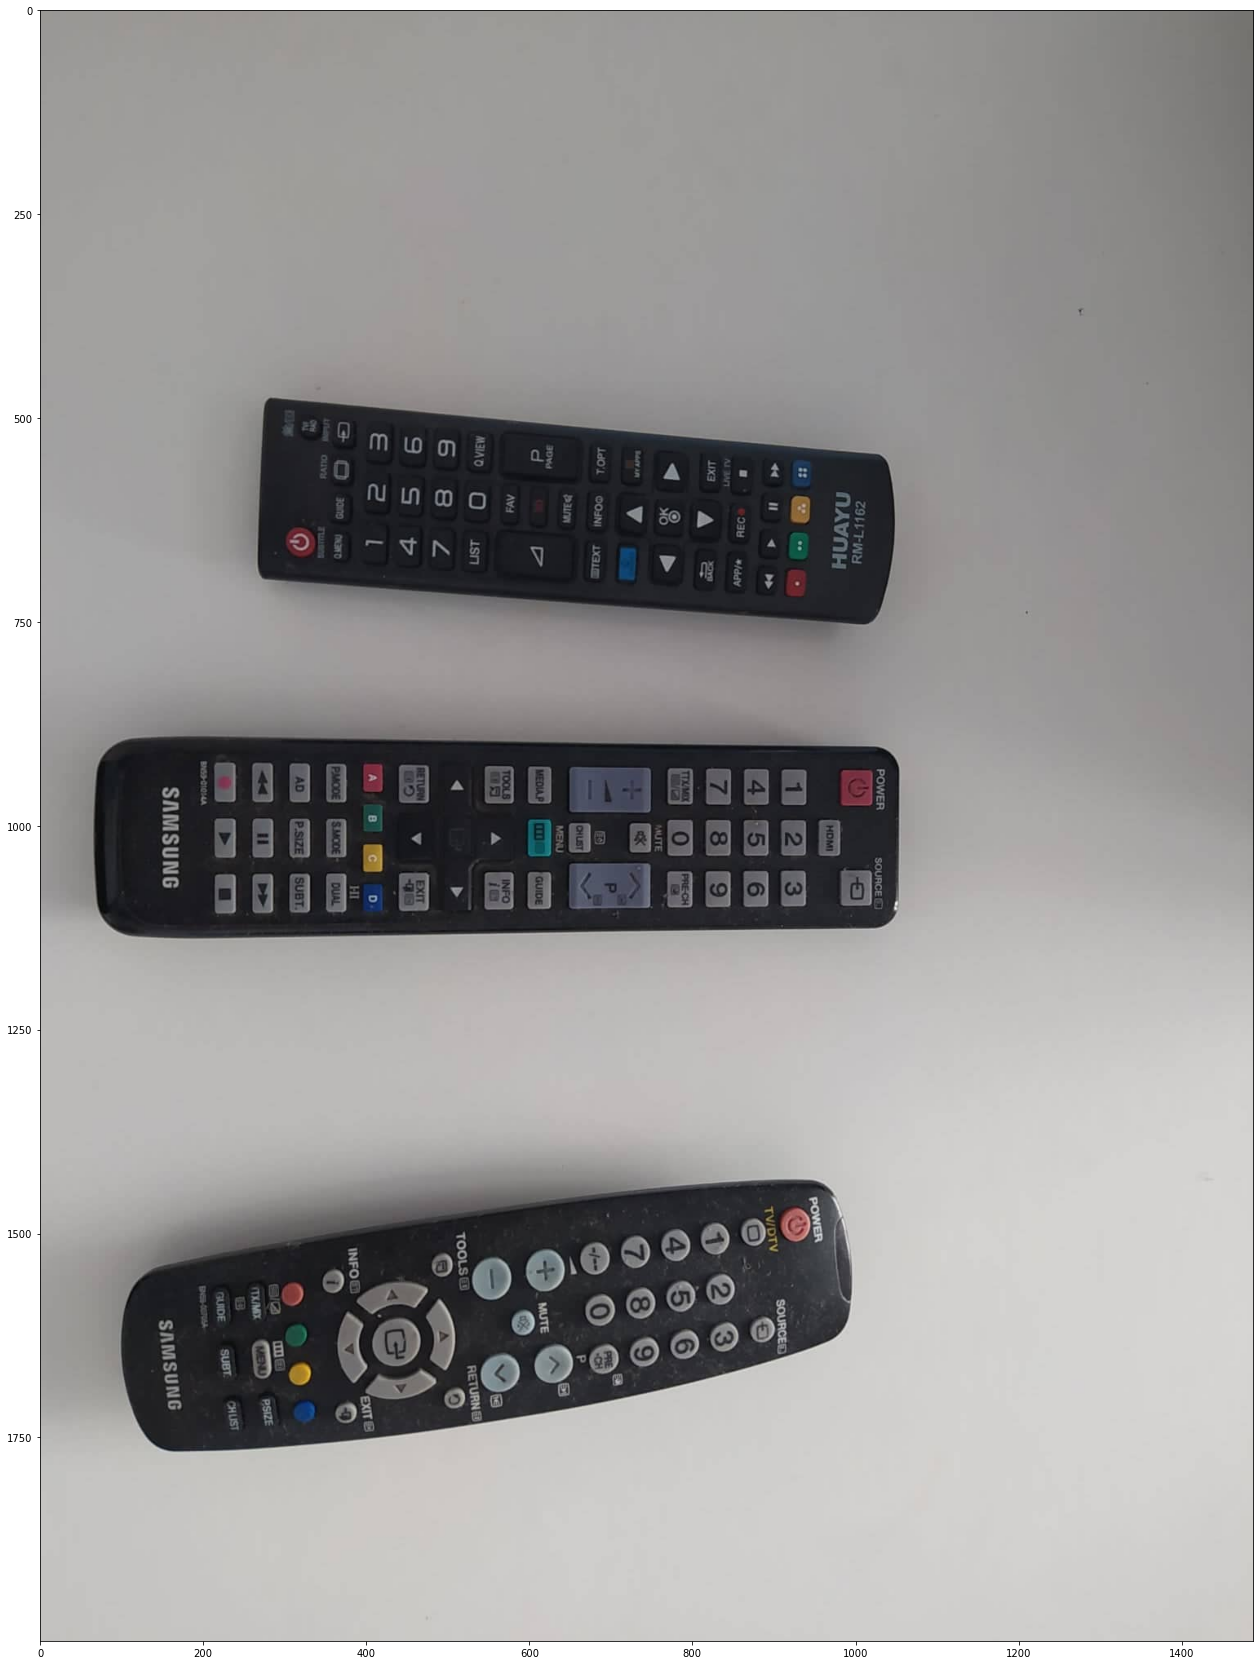

In [11]:
#Load and display the image and some infos
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread
import PIL
import imageio
import scipy
import scipy.ndimage
controllers = imageio.imread(r'C:\Users\damia\Documents\UNIVERSITA\Master in Big Data Solutions in Barcelona\CORSI\Data Science Foundations\Assignments\controllers.png')
print("Mean ", controllers.mean(), "| Max ", controllers.max(), "| Min ", controllers.min())
plt.figure(figsize = (30,30))
controllers_pyplot = plt.imshow(controllers, cmap="gray")

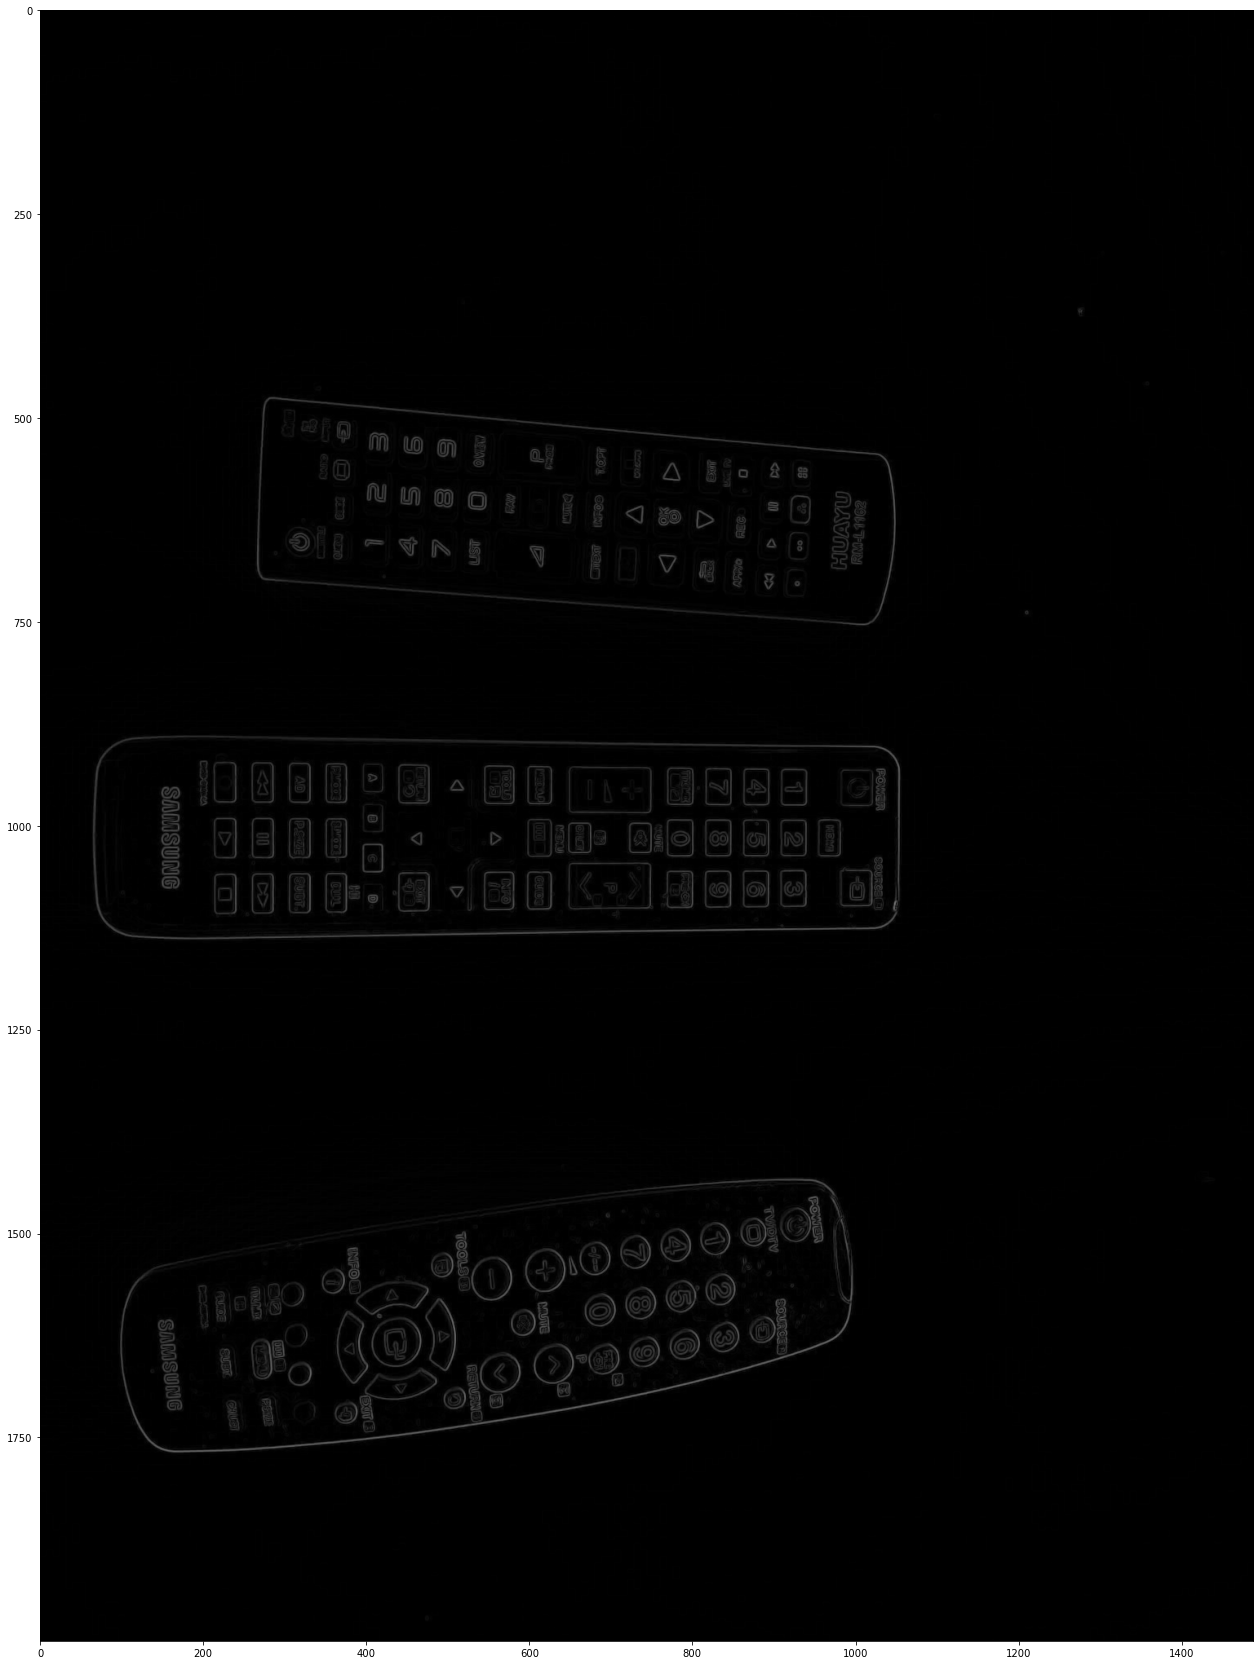

In [12]:
#I apply the sobel filter to the image
import skimage
import matplotlib.pyplot as plt
from skimage import data
graycontrollers= rgb2gray(controllers)
from skimage.filters import sobel
sobel_graycontrollers= sobel(graycontrollers)


plt.figure(figsize = (30,30))
plt.imshow(sobel_graycontrollers, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

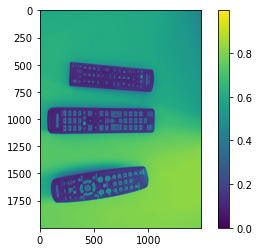

In [13]:
#REGIONAL SEGMENTATION
#I check at the values of the pixels inside the picture in order to decide the values in order to mark the controllers and
#the background.

import matplotlib.pyplot as plt
plt.imshow(graycontrollers)
plt.colorbar()
plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


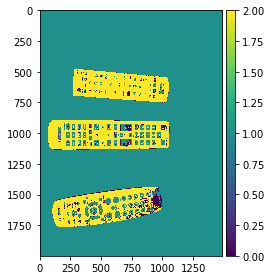

In [15]:
# I create a zeros array with the same size/shape as the image with the controllers
markers = np.zeros_like(graycontrollers)

# When the pixels are above 0.3 (see image above), I label as background(1)
markers[graycontrollers > 0.3] = 1

# When the pixels are below 0.2 (see image above), I label as controllers(2)
markers[graycontrollers < 0.2] = 2
from skimage.io import imshow
imshow(markers)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


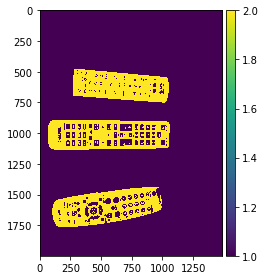

In [16]:
#I use the watersheed function to fil the controllers using the image filtered with sobel and the markers to detect the
#background and the objects(in this case controllers)
from skimage.morphology import watershed
regional_segmentation_watersheed = watershed(sobel_graycontrollers, markers)
imshow(regional_segmentation_watersheed)

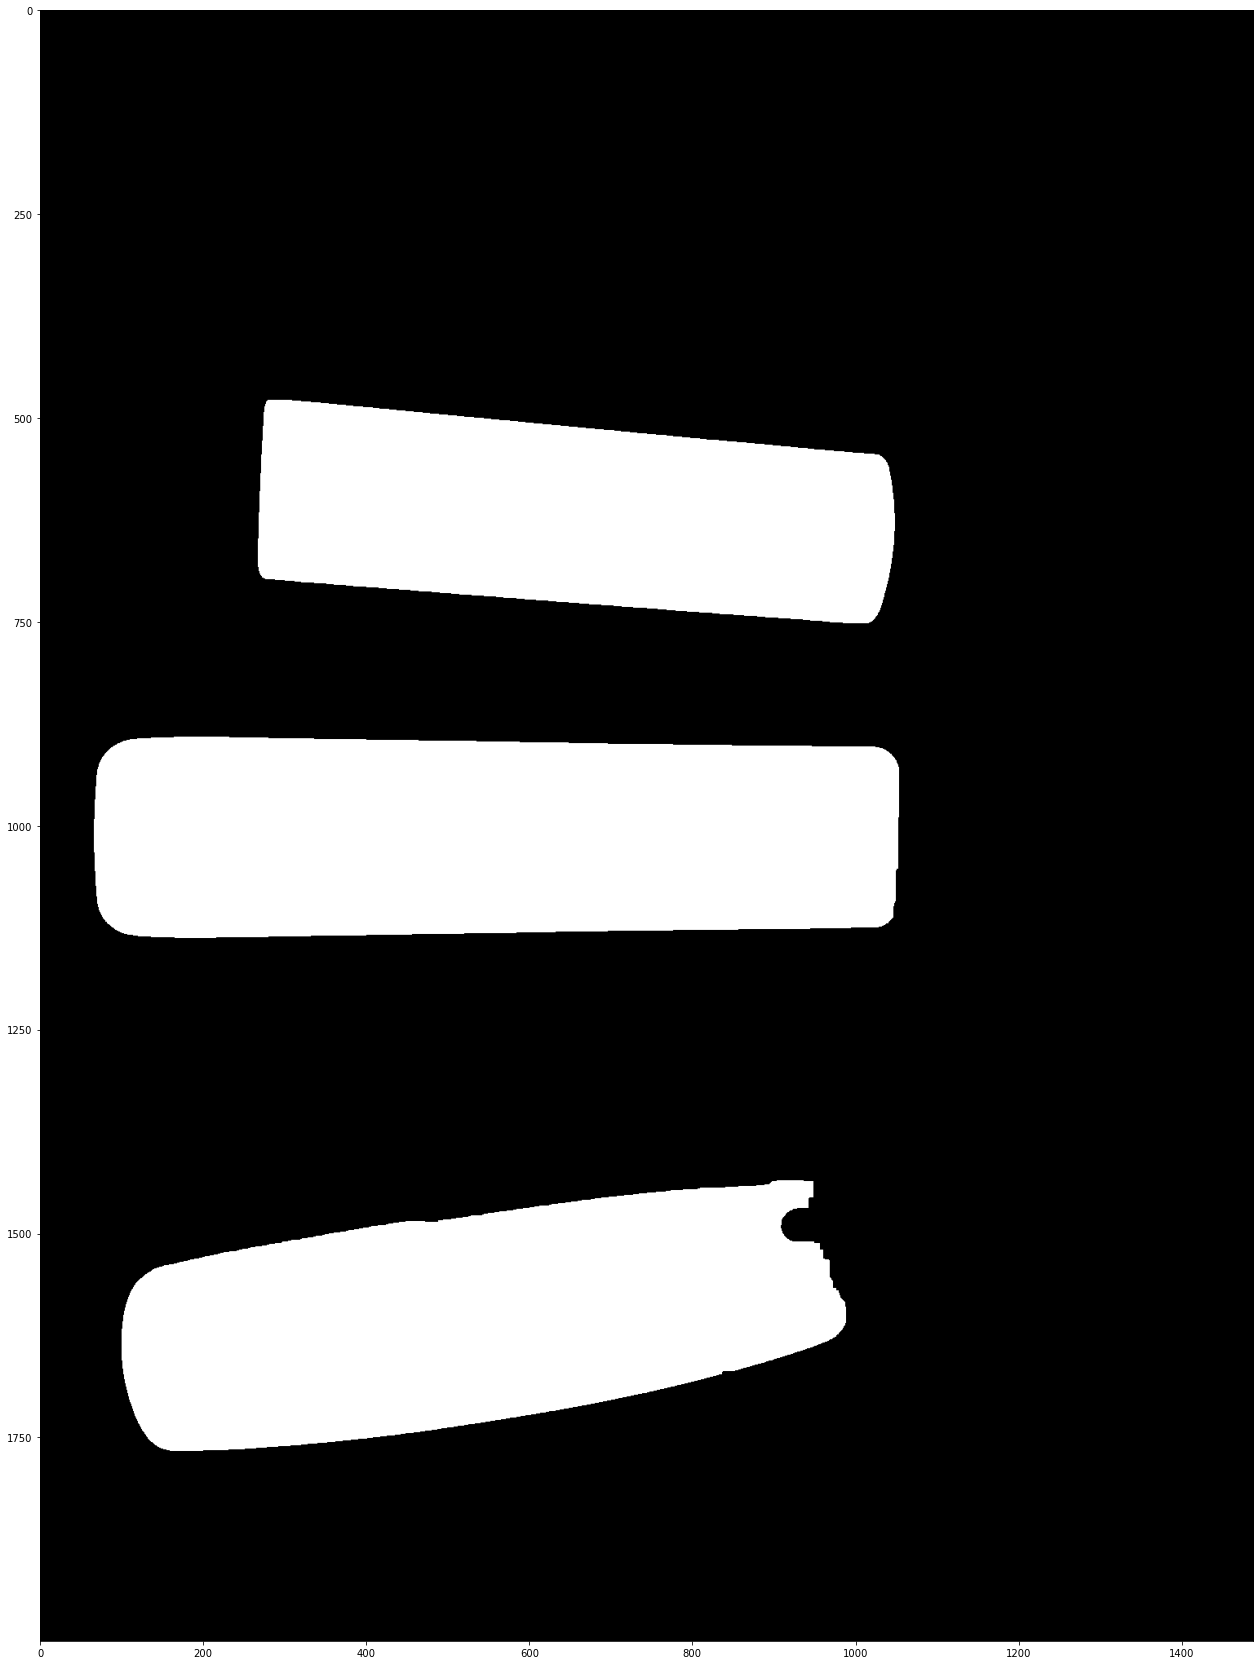

In [18]:
# Filling the image
from scipy import ndimage as ndi
filled_segmentation_treshold = ndi.binary_fill_holes(regional_segmentation_watersheed - 1)

 # Then performing an Opening operation to remove the noise(the white spots out of the objects I want to detect)
# Here I use a big kernel(20,20) because I want to remove the upper part of one of the 3 controllers because it appears as a littl
# object a part. 
opening_segmentation_treshold = ndimage.binary_opening(filled_segmentation_treshold, structure=np.ones((20,20))).astype(filled_segmentation_treshold.dtype)


# Then performing a Closing operation to ensure that the objects are filled(it may be useless this additional operation to fil)

closing_segmentation_treshold = ndimage.binary_closing(opening_segmentation_treshold, structure=np.ones((3,3))).astype(opening_segmentation_treshold.dtype)

plt.figure(figsize = (30,30))
plt.imshow(closing_segmentation_treshold, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()



3


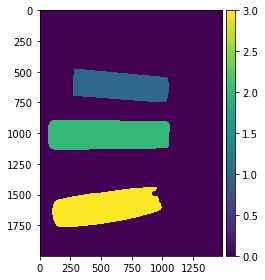

In [19]:
#I count the number of controllers
labeled_controllers, _ = ndi.label(closing_segmentation_treshold)
print(_)
imshow(labeled_controllers)